<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Statistical Inference and Confidence Intervals

### Learning Objectives
- Explain the relationships among parameter, sample, statistic, and population.
- Define and describe sampling distribution.
- Describe the Central Limit Theorem.
- Generate and interpret a theoretical confidence interval.

## Video Game Example
Let's say you are playing a video game (like "Halo" or "Call of Duty") where the goal is to kill your opponent. Additionally, let's say your opponent is invisible.

When deciding which weapon to use, you have two options:
- a sniper rifle with one bullet in it, or
- a grenade launcher with one grenade in it. 

<details><summary>Which weapon would you prefer?</summary>
    
- You're likely going to prefer the grenade launcher!
- Why? Well, an explosion from a grenade will cover more area than one bullet fired from a rifle.

![](./images/halo3.gif)
</details>

This is the same as the logic behind confidence intervals. By calculating a statistic on a sample, ***maybe*** we get lucky and our statistic is exactly equal to our parameter... however, we're probably not going to get this lucky.

Let's see an example of that.

## Polling Example

You're running for office in a small town of 1,000 voters. Everyone in your town cares deeply about voting, so all 1,000 of them are going to vote.

You'd like to ask "All in all, do you think things in the nation are generally headed in the right direction?"

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [18]:
# Set a seed so we get the same results.
np.random.seed(42)

In [19]:
# # PEP 8 - Style Guide for Python
# x = 1 + 2 + 3 + 4
# y = 1 + 2*3 + 4

In [20]:
# We are simulating a population of 1,000.
# Each person has a 40% chance of saying
# "Yes, things are headed in the right direction."
population = np.random.binomial(n=1,
                                p=0.4,
                                size=1000)

In [21]:
population.shape

(1000,)

In [22]:
# What is the percentage of our pop'n that think the country is headed in the right direction?
population.mean()

0.387

Above, we simulated a population of people where **38.7%** of them think the country is headed in the right direction. 

**But your campaign doesn't know this. Your campaign wants to learn what the true value of $p$ is!**

The problem is, you don't have enough money and time to call all 1,000 of them. You can only call 50.

In [24]:
sample = np.random.choice(population, size = 50, replace = False) # Sampling without replacement. 

In [25]:
sample

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0])

In [26]:
sample.mean()

0.4

In [27]:
sample = np.random.choice(population, size = 50, replace = False) # Sampling without replacement. 

sample.mean()

0.44

#### Even if we randomly sample, we aren't guaranteed to get a good sample!

<details><summary>How do we get around this?</summary>
    
![](./images/halo.gif)
### By switching to our grenade launcher.
</details>

When a poll is reported, you likely see something like this:

![](./images/polling.png)

In the upper-right corner, you can see "$\text{margin of error }\pm\text{ }3.1$". 

#### What is a margin of error?
This means that it's pretty likely that these poll results are within "plus 3.1%" or "minus 3.1%" of the real value.

#### Why is there a margin of error?
We recognize that one sample of 50 people can't definitively speak for all registered voters! If I had taken a different sample of 50 people, then my results might be pretty different. We hope not, but it's entirely possible.

The margin of error is a way for us to describe our uncertainty in our statistic based on how much our statistic changes from one sample to another sample.
- Realistically, we only pull one sample of size $n$ out of all possible samples of size $n$.
- We only see one sample percentage out of all possible statistics.
- We won't ever actually **see** the sample-to-sample variability!
    - This makes sense, right? It doesn't make sense for me to take ten samples of size 50... instead, I would just take one sample of 500!
    
#### If we don't ever actually observe how much our statistic changes from one sample to another sample, then how can we get a margin of error?

There are two ways to do this:
- We can get theory to do it. (i.e. relying on statistics and probability theory)
- We can estimate it empirically from our existing data.

## Confidence Interval Based on Theory

By quantifying the margin of error, we can construct what is known as a **confidence interval**.

A confidence interval is a set of likely values for the parameter of interest.

--- 

<details><summary>If I could theoretically plot all possible sample percentages and how frequently I see each sample percentage... what is this?</summary>

- This is the distribution of all sample percentages!
- This is known as the **sampling distribution**.
</details>

Luckily, there is a theoretical result about this exact thing!

### The Central Limit Theorem
The Central Limit Theorem is the most important theorem in all of statistics. It states:

As the size of our sample $n$ gets closer and closer to infinity, our sampling distribution (the distribution of all possible sample means) approaches a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

**In English**: This means that if I take a sample of size $n$ and find the mean of that sample, then do it for all possible samples of size $n$, this distribution of sample means should be Normally distributed as long as $n$ is big enough.

**Practically**: If I want to study the sample mean (or the sample percentage), I can use the Normal distribution to generate a confidence interval, as long as the size of our sample $n$ is large enough!

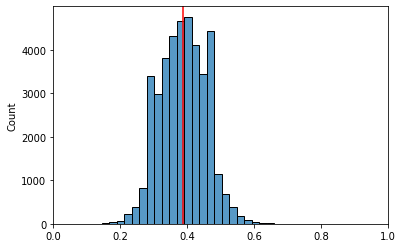

### Confidence Interval Formula

The formula for a confidence interval is:

$$
\text{[sample statistic]} \pm \text{[multiplier]} \times \text{[standard deviation of sampling distribution]}
$$

- The **sample statistic** is the statistic of our sample!
- The **standard deviation of the sampling distribution** quantifies that sample-to-sample variability for us. (This is commonly called the [standard error](https://stattrek.com/estimation/standard-error.aspx).)
- The **multiplier** is a number drawn from the Normal distribution that makes sure our confidence interval is appropriately wide given how confident we want to be in our result.
    - The **margin of error** is the multiplier times the standard deviation of the sampling distribution.

*Extra:* To learn about the derivation of the confidence interval for a given confidence level, [head here](https://amsi.org.au/ESA_Senior_Years/SeniorTopic4/4h/4h_2content_11.html).

--- 

Example: I want to find the 95% confidence interval for the percentage of people who think the nation is on the right track.

The formula is:

$$
\begin{eqnarray*}
\text{[sample statistic] } &\pm& \text{[multiplier] } \times \text{[standard deviation of sampling distribution]} \\
\bar{x} &\pm& z^* \times \frac{\sigma}{\sqrt{n}} \\
\Rightarrow \bar{x} &\pm& 1.96 \times \frac{\sigma}{\sqrt{n}}
\end{eqnarray*}
$$

0.44

In [31]:
# Calc the lower bound here


0.30240855840569153

In [32]:
# Calc the upper bound here


0.5775914415943084

Our 95% confidence interval for the percentage of people who think our country is on the right track is **(24.55%, 51.45%)**.

#### Interpretation (*this will come up in interviews*)

In general: **"With confidence level 95%, the true population mean lies in the confidence interval."**

For this example: **"With confidence level 95%, the true population percentage of people who think our country is on the right track is between 24.55% to 51.45%."**
- Generally, we would say:
    - "I am {confidence level}% confident 
    - that the true population {parameter} 
    - is between {lower confidence bound} and {upper confidence bound}."

---

Two common misconceptions:

1. There is *not* a 95% probability that the true parameter lies within a particular confidence interval. Make sure you do not use the word probability! Instead, we are confident that over a large number of samples, 95% of them will contain the population statistic.

2. As the number of samples increases, the standard deviation of the sampling distribution decreases. However, a small standard deviation by itself does not imply that the mean is accurate. (For example, units matter!)

---

Write a function called `conf_int()` to take in an array of data and return a 95% confidence interval. Run your function on `sample_2` and interpret your results.

In [33]:
sample_2 = 

In [34]:
def conf_int(array): 

(0.3354977265172791, 0.4205022734827209)

<details><summary>Interpretation:</summary>"I am 95% confident that the true population percentage of people who believe our country is on the right track is between 30.24% and 57.76 percent."</details>

---

Note: For a confidence interval, our multiplier is 1.96. The number 1.96 comes from a standard Normal distribution.
- The area under the standard Normal distribution between -1.96 and +1.96 is 95%.
- For 90% confidence, use 1.645.
- For 99% confidence, use 2.576.

#### This seems straightforward enough... why don't we always just "use theory?"
- The "standard deviation of the statistic" formula is easy when we're generating confidence intervals for one mean or one percentage.
- That formula gets more complicated if we want to calculate a confidence interval for a correlation coefficient, for the difference between two means, or for something else.
- Also, the Central Limit Theorem above describes how sample means work. Relying on the Normal distribution is tough when our sample size $n$ is small (below 30) or when we're calculating something other than basic means and percentages.

# To sum up:
- Our goal is usually to learn about a population.
- Oftentimes, money, time, energy, and other constraints prevent us from measuring the entire population directly.
- We take a sample from this population and calculate a statistic on our sample.
- We want to use this sample statistic to understand our population parameter!
- By just calculating a statistic, we're effectively using our sniper rifle. Instead, we want a grenade launcher!
- The statistical equivalent of a grenade launcher is a **confidence interval**. A confidence interval is a set of likely values for the parameter of interest.
- In order to construct our confidence interval, we use our sample statistic and attach a margin of error to it. We can then quantify how confident we are that the true population parameter is inside the interval.
- The formula for any confidence interval is given by $\text{[sample statistic] } \pm \text{[multiplier] } \times \text{[standard deviation of sampling distribution]}$.
- The formula for a 95% confidence interval for sample means or proportions is $\bar{x} \pm 1.96\frac{\sigma}{\sqrt{n}}$.
- I would interpret a 95% confidence interval $(a,b)$ as follows:
    - "I am 95% confident that the true population parameter is in between $a$ and $b$."